In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [2]:
!pip install openpyxl ssqueezepy pyt

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 31.6 MB/s eta 0:00:00
  Created wheel for pyt: filename=pyt-1.0.5-py3-none-any.whl size=16716 sha256=620b92e7e81dc1bbb4459957a535442102029494466e974865eca49352f09e8b
  Stored in directory: /home/work/.cache/pip/wheels/79/44/3a/ec16180c30a94673c22d6e12f30ae7f64bd1319df5395edd56
Successfully built pyt


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array

2025-01-19 11:36:46.374104: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 11:36:46.374204: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 11:36:46.374238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 11:36:46.383497: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
df = pd.read_csv('mhealth_full.csv')
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [6]:
df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity', 'subject'],
      dtype='object')

- 0: 'Null',
- 1: 'Standing still',
- 2: 'Sitting and relaxing',
- 3: 'Lying down',
- 4: 'Walking',
- 5: 'Climbing stairs',
- 6: 'Waist bends forward',
- 7: 'Frontal elevation of arms',
- 8: 'Knees bending (crouching)',
- 9: 'Cycling',
- 10: 'Jogging',
- 11: 'Running',
- 12: 'Jump front & back'

In [7]:
df_activity_4 = df[df['activity'] == 4]
df_activity_5 = df[df['activity'] == 5]
df_activity_6 = df[df['activity'] == 6]
df_activity_7 = df[df['activity'] == 7]
df_activity_8 = df[df['activity'] == 8]
df_activity_9 = df[df['activity'] == 9]
df_activity_10 = df[df['activity'] == 10]
df_activity_11 = df[df['activity'] == 11]
df_activity_12 = df[df['activity'] == 12]

In [8]:
df = pd.concat([df_activity_4, df_activity_5, df_activity_6, df_activity_7,
                df_activity_8, df_activity_9, df_activity_10, df_activity_11, df_activity_12])

In [9]:
df.activity.value_counts()

4     30720
5     30720
9     30720
10    30720
11    30720
7     29441
8     29337
6     28315
12    10342
Name: activity, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity']=le.fit_transform(df['activity'])

In [11]:
df['activity'].value_counts()

0    30720
1    30720
5    30720
6    30720
7    30720
3    29441
4    29337
2    28315
8    10342
Name: activity, dtype: int64

In [12]:
df= df.drop(['subject'], axis=1)

In [13]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X)
scaled_X['activity'] = y.values

scaled_X

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,activity
0,-0.409056,0.254558,0.796386,0.572999,-0.019329,0.346010,1.120465,0.405766,1.320098,-0.334105,...,-0.586085,-0.521382,0.261791,-0.695260,-0.201243,0.703033,-0.165167,0.168818,-0.464267,0
1,-0.239083,0.383976,0.808137,0.802804,0.105430,0.290652,1.189920,0.303758,1.146921,-0.255864,...,-0.481711,-0.512105,0.103551,-0.695260,-0.201243,0.703033,-0.206193,-0.409901,-0.268252,0
2,-0.071813,0.268907,0.769339,0.531591,0.106779,0.242842,1.189920,0.303758,1.146921,-0.200183,...,-0.211298,-0.535371,-0.059490,-0.677265,-0.311789,0.651376,-0.207228,-0.526694,-0.039984,0
3,0.111470,0.077340,0.983185,-0.049444,0.145815,0.330340,1.189920,0.303758,1.146921,-0.159860,...,-0.007196,-0.437994,-0.040395,-0.677265,-0.311789,0.651376,-0.165209,-0.343029,0.131508,0
4,0.151655,-0.046332,1.134441,0.306751,0.085197,0.268896,1.226673,0.163489,1.042298,-0.143451,...,0.074772,-0.231770,-0.029355,-0.677265,-0.311789,0.651376,-0.087258,-0.156576,0.232324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251030,-2.348146,1.243012,-1.024875,-0.871731,-1.836649,0.849474,1.181750,1.036910,-1.097225,-0.210161,...,-0.775219,0.233099,0.127606,-0.439623,-1.068614,-0.540603,0.016065,0.361232,0.085609,8
251031,-2.342607,0.836976,-2.637098,-4.891259,-1.877719,-0.594552,1.181750,1.036910,-1.097225,-0.304509,...,-2.781607,-0.539641,0.391286,-0.439623,-1.068614,-0.540603,0.236848,0.965652,-0.221061,8
251032,-2.325821,-1.062191,-2.751625,1.238765,-1.839065,-0.081888,1.181750,1.036910,-1.097225,-0.350447,...,-2.778386,-1.790090,0.571830,-0.439623,-1.068614,-0.540603,0.445206,0.164812,-0.358350,8
251033,-2.321792,-1.476545,-1.305493,0.285816,-1.856983,-0.847625,1.381945,1.266410,-0.963733,0.132894,...,-2.754003,-1.789060,-0.169060,-0.418029,-1.106919,-0.532655,0.655751,-0.893206,0.039471,8


In [15]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 128
STEP = 40

X, y = create_dataset(scaled_X.drop(['activity'], axis=1), scaled_X['activity'], TIME_STEPS,
                                  STEP)

In [16]:
# Create train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=111)
trainX, valX, trainy, valy  = train_test_split(trainX, trainy, test_size=0.2, random_state=111)

In [17]:
trainX.shape, testX.shape, trainy.shape, testy.shape 

((4014, 128, 21), (1255, 128, 21), (4014, 1), (1255, 1))

In [18]:
# Convert output variables to categorical for CNN
trainy_one_hot = to_categorical(trainy)
print(trainy_one_hot.shape)

testy_one_hot = to_categorical(testy)
print(testy_one_hot.shape)

valy_one_hot = to_categorical(valy)
print(valy_one_hot.shape)

(4014, 9)
(1255, 9)
(1004, 9)


In [19]:
import os

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer, RepeatVector, Add, Permute, Multiply

# KERAS_ATTENTION_DEBUG: If set to 1. Will switch to debug mode.
# In debug mode, the class Attention is no longer a Keras layer.
# What it means in practice is that we can have access to the internal values
# of each tensor. If we don't use debug, Keras treats the object
# as a layer, and we can only get the final output.
debug_flag = int(os.environ.get('KERAS_ATTENTION_DEBUG', 0))


# References:
# - https://arxiv.org/pdf/1508.04025.pdf (Luong).
# - https://arxiv.org/pdf/1409.0473.pdf (Bahdanau).
# - https://machinelearningmastery.com/the-bahdanau-attention-mechanism/ (Some more explanation).

class Attention(object if debug_flag else Layer):
    SCORE_LUONG = 'luong'
    SCORE_BAHDANAU = 'bahdanau'

    def __init__(self, units: int = 128, score: str = 'luong', **kwargs):
        super(Attention, self).__init__(**kwargs)
        if score not in {self.SCORE_LUONG, self.SCORE_BAHDANAU}:
            raise ValueError(f'Possible values for score are: [{self.SCORE_LUONG}] and [{self.SCORE_BAHDANAU}].')
        self.units = units
        self.score = score

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        input_dim = int(input_shape[-1])
        with K.name_scope(self.name if not debug_flag else 'attention'):
            # W in W*h_S.
            if self.score == self.SCORE_LUONG:
                self.luong_w = Dense(input_dim, use_bias=False, name='luong_w')
                # dot : last hidden state H_t and every hidden state H_s.
                self.luong_dot = Dot(axes=[1, 2], name='attention_score')
            else:
                # Dense implements the operation: output = activation(dot(input, kernel) + bias)
                self.bahdanau_v = Dense(1, use_bias=False, name='bahdanau_v')
                self.bahdanau_w1 = Dense(input_dim, use_bias=False, name='bahdanau_w1')
                self.bahdanau_w2 = Dense(input_dim, use_bias=False, name='bahdanau_w2')
                self.bahdanau_repeat = RepeatVector(input_shape[1])
                self.bahdanau_tanh = Activation('tanh', name='bahdanau_tanh')
                self.bahdanau_add = Add()

            self.h_t = Lambda(lambda x: x[:, -1, :], output_shape=(input_dim,), name='last_hidden_state')

            # exp / sum(exp) -> softmax.
            self.softmax_normalizer = Activation('softmax', name='attention_weight')

            # dot : score * every hidden state H_s.
            # dot product. SUM(v1*v2). H_s = every source hidden state.
            self.dot_context = Dot(axes=[1, 1], name='context_vector')

            # [Ct; ht]
            self.concat_c_h = Concatenate(name='attention_output')

            # x -> tanh(w_c(x))
            self.w_c = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')
        if not debug_flag:
            # debug: the call to build() is done in call().
            super(Attention, self).build(input_shape)

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

    def __call__(self, inputs, training=None, **kwargs):
        if debug_flag:
            return self.call(inputs, training, **kwargs)
        else:
            return super(Attention, self).__call__(inputs, training, **kwargs)

    # noinspection PyUnusedLocal
    def call(self, inputs, training=None, **kwargs):
        """
        Many-to-one attention mechanism for Keras. Supports:
            - Luong's multiplicative style.
            - Bahdanau's additive style.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @param training: not used in this layer.
        @return: 2D tensor with shape (batch_size, units)
        @author: philipperemy, felixhao28.
        """
        h_s = inputs
        if debug_flag:
            self.build(h_s.shape)
        h_t = self.h_t(h_s)
        if self.score == self.SCORE_LUONG:
            # Luong's multiplicative style.
            score = self.luong_dot([h_t, self.luong_w(h_s)])
        else:
            # Bahdanau's additive style.
            self.bahdanau_w1(h_s)
            a1 = self.bahdanau_w1(h_t)
            a2 = self.bahdanau_w2(h_s)
            a1 = self.bahdanau_repeat(a1)
            score = self.bahdanau_tanh(self.bahdanau_add([a1, a2]))
            score = self.bahdanau_v(score)
            score = K.squeeze(score, axis=-1)

        alpha_s = self.softmax_normalizer(score)
        context_vector = self.dot_context([h_s, alpha_s])
        a_t = self.w_c(self.concat_c_h([context_vector, h_t]))
        return a_t

    def get_config(self):
        config = super(Attention, self).get_config()
        config.update({'units': self.units, 'score': self.score})
        return config

In [20]:
SINGLE_ATTENTION_VECTOR = False
INPUT_DIMS = 3

def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = inputs
    a = tf.keras.layers.Permute((2, 1))(inputs)
    #a = Reshape((input_dim, TIME_STEPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(input_dim, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((1, 2), name='attention_vec')(a)

    #output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# Another way of writing the attention mechanism is suitable for the use of the above error source:https://blog.csdn.net/uhauha2929/article/details/80733255
def attention_3d_block2(inputs, single_attention_vector=False):
    # If the upper layer is LSTM, you need return_sequences=True
    # inputs.shape = (batch_size, time_steps, input_dim)
    time_steps = K.int_shape(inputs)[1]
    input_dim = K.int_shape(inputs)[2]
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    # Multiplied by the attention weight, but there is no summation, it seems to have little effect
    # If you classify tasks, you can do Flatten expansion
    # element-wise
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul


In [21]:
INPUT_DIMS = 3

In [22]:
#score='luong'
score='bahdanau'

In [23]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]
n_timesteps, n_features, n_outputs

(128, 21, 9)

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Flatten

inputs= Input(shape=(n_timesteps,n_features))

lstm_out = LSTM(128, return_sequences=True)(inputs)
lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = Dropout(0.3)(lstm_out)
attention_mul = attention_3d_block(lstm_out)
attention_mul = Flatten()(attention_mul)

##dense layer
dense = Dense(64, activation='relu')(attention_mul)
outputs = Dense(9, activation='softmax')(dense)
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



2025-01-19 11:36:55.367535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
2025-01-19 11:36:55.369892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:cc:00.0, compute capability: 8.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 21)]            0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128, 128)             76800     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128, 128)             131584    ['lstm[0][0]']                
                                                                                                  
 lstm_2 (LSTM)               (None, 128, 128)             131584    ['lstm_1[0][0]']              
                                                                                              

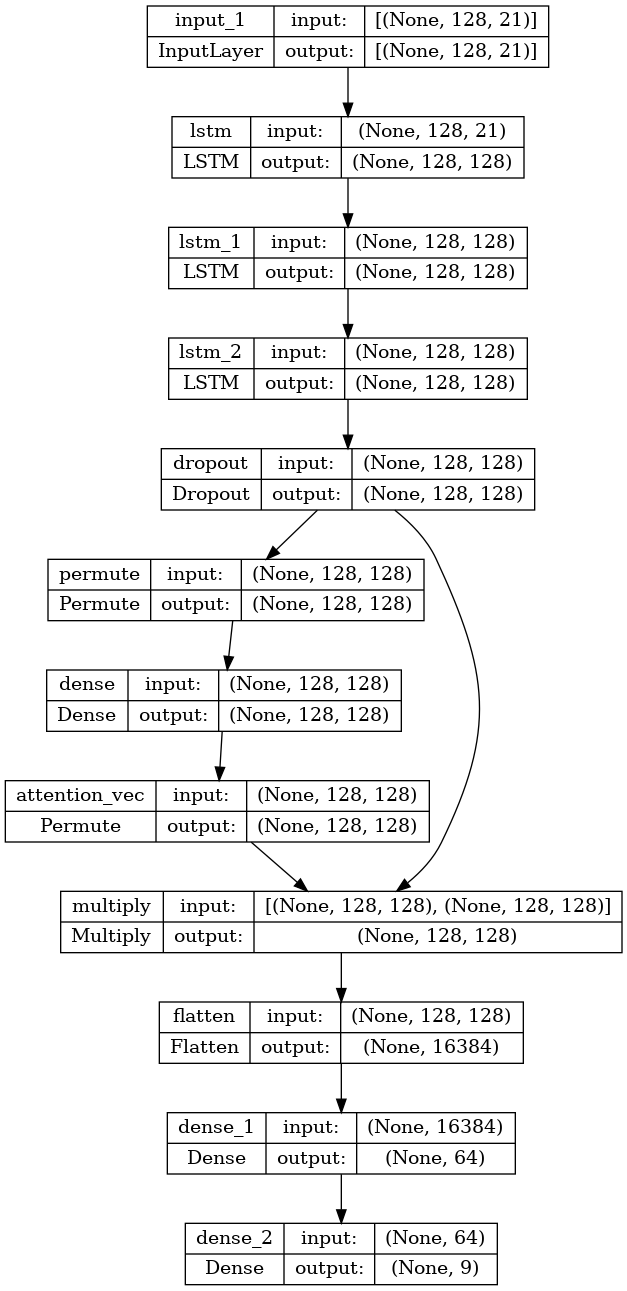

In [25]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


In [26]:
import math
import time
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

start = time.time()
#model_history=model.fit(X_train, y_train_one_hot, epochs=300, batch_size=32, validation_data=(X_val,y_val_one_hot), callbacks = [early_stopping])
model_history=model.fit(trainX, trainy_one_hot, epochs=50, batch_size=32, validation_data=(valX,valy_one_hot))


end = time.time()
print(f"{end - start:.5f} sec")

Epoch 1/50


2025-01-19 11:37:00.357610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-01-19 11:37:01.249796: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f39380303d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-19 11:37:01.249841: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2025-01-19 11:37:01.249848: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2025-01-19 11:37:01.254882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-19 11:37:01.338091: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


126/126 [==============================] - 10s 36ms/step - loss: 0.7640 - accuracy: 0.7280 - val_loss: 0.2880 - val_accuracy: 0.8944
Epoch 2/50
126/126 [==============================] - 3s 27ms/step - loss: 0.1666 - accuracy: 0.9372 - val_loss: 0.0892 - val_accuracy: 0.9741
Epoch 3/50
126/126 [==============================] - 3s 27ms/step - loss: 0.0803 - accuracy: 0.9736 - val_loss: 0.0466 - val_accuracy: 0.9910
Epoch 4/50
126/126 [==============================] - 3s 25ms/step - loss: 0.0411 - accuracy: 0.9888 - val_loss: 0.0240 - val_accuracy: 0.9920
Epoch 5/50
126/126 [==============================] - 3s 27ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0393 - val_accuracy: 0.9910
Epoch 6/50
126/126 [==============================] - 4s 28ms/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0128 - val_accuracy: 0.9960
Epoch 7/50
126/126 [==============================] - 3s 26ms/step - loss: 0.0070 - accuracy: 0.9973 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 8/5

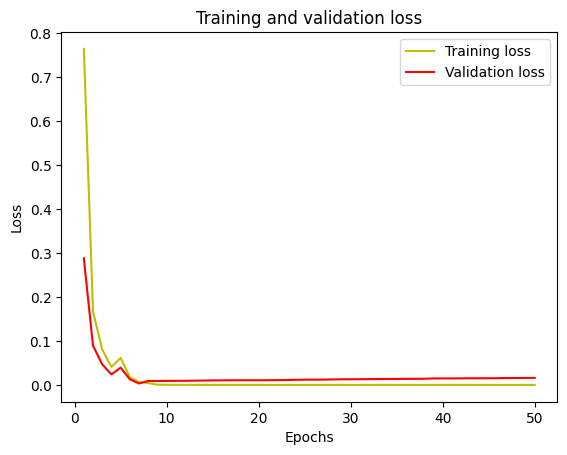

In [27]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

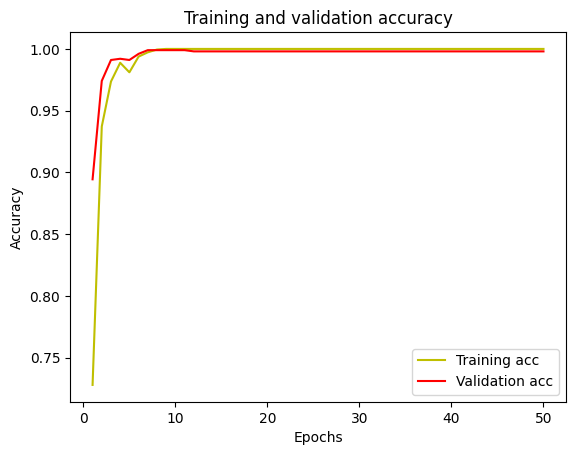

In [28]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40/40 [==============================] - 1s 10ms/step
Classification Report:
                           precision    recall  f1-score   support

                  Walking       1.00      1.00      1.00       154
          Climbing stairs       0.99      1.00      1.00       155
      Waist bends forward       1.00      0.99      1.00       126
Frontal elevation of arms       1.00      1.00      1.00       153
Knees bending (crouching)       1.00      1.00      1.00       156
                  Cycling       1.00      1.00      1.00       140
                  Jogging       1.00      1.00      1.00       146
                  Running       0.99      1.00      1.00       155
        Jump front & back       1.00      0.99      0.99        70

                 accuracy                           1.00      1255
                macro avg       1.00      1.00      1.00      1255
             weighted avg       1.00      1.00      1.00      1255

Test Accuracy: 1.00


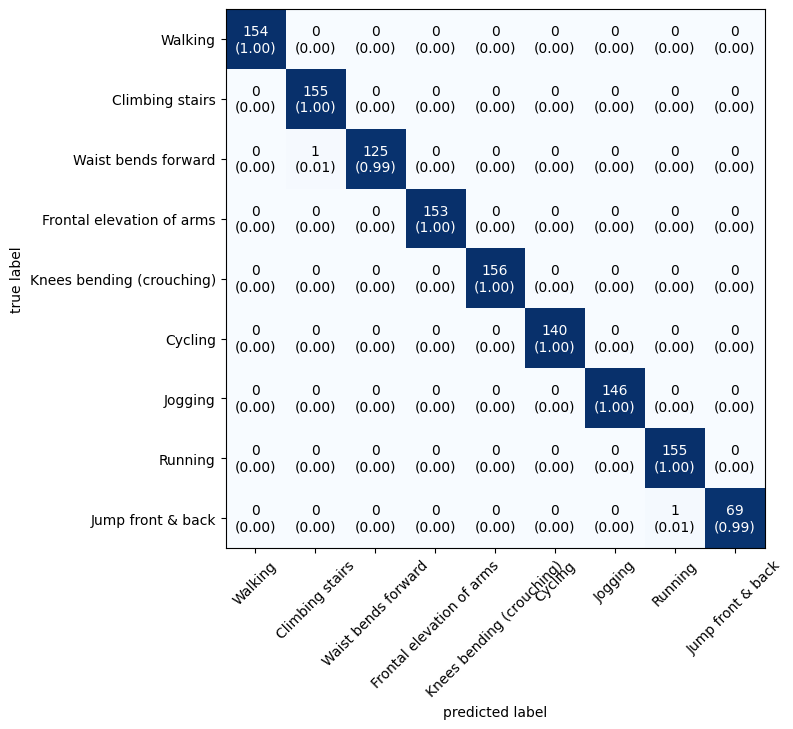

In [30]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = model.predict(testX)
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['Walking', 'Climbing stairs', 'Waist bends forward', 'Frontal elevation of arms', 'Knees bending (crouching)', 'Cycling', 'Jogging', 'Running', 'Jump front & back']

# 혼동 행렬 생성
cm = confusion_matrix(testy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(testy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(testy, predy)
print(f"Test Accuracy: {accuracy:.2f}")


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))

[[154   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0]
 [  0   1 125   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   0]
 [  0   0   0   0 156   0   0   0   0]
 [  0   0   0   0   0 140   0   0   0]
 [  0   0   0   0   0   0 146   0   0]
 [  0   0   0   0   0   0   0 155   0]
 [  0   0   0   0   0   0   0   1  69]]
0.998406374501992
0.9984044830915608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       0.99      1.00      1.00       155
           2       1.00      0.99      1.00       126
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1.00       156
           5       1.00      1.00      1.00       140
           6       1.00      1.00      1.00       146
           7       0.99      1.00      1.00       155
           8       1.00      0.99      0.99        70

    accuracy                           1.00      1255
   macro avg   